# Import modules

In [2]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/home/eharkin/projects/5HTGIF-dev


In [3]:
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np

from src.Simulation import GIFnet_Simulation
from src.Tools import PSTH

# Load data

In [6]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')
simfiles = {}
for cond in ['subsample_base', 'subsample_noIA', 'subsample_fixedIA']:
    for fname in os.listdir(os.path.join(DATA_PATH, cond)):
        if fname[-4:].lower() == 'hdf5' and 'test' not in fname:
            try:
                simfiles[cond + '_' + fname[:-5]] = GIFnet_Simulation(os.path.join(DATA_PATH, cond, fname), mode = 'r')
            except IOError:
                warnings.warn('Problem with file {}. Continuing.'.format(fname), RuntimeWarning)
        else:
            continue

/home/eharkin/miniconda3/envs/pseudopozz/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Problem with file m_g_3.hdf5. Continuing.
  if __name__ == '__main__':


In [7]:
simfiles.keys()

['subsample_noIA_m_g_3',
 'subsample_fixedIA_l_g_1',
 'subsample_fixedIA_m_g_1',
 'subsample_noIA_l_g_2',
 'subsample_base_m_g_2',
 'subsample_base_m_g_1',
 'subsample_noIA_l_g_1',
 'subsample_noIA_m_g_2',
 'subsample_base_m_ng_2',
 'subsample_base_m_ng_3',
 'subsample_noIA_l_ng_3',
 'subsample_noIA_l_ng_2',
 'subsample_noIA_m_ng_2',
 'subsample_fixedIA_m_ng_1',
 'subsample_fixedIA_m_ng_2',
 'subsample_fixedIA_m_ng_3',
 'subsample_noIA_m_ng_1',
 'subsample_noIA_l_ng_1',
 'subsample_fixedIA_l_g_3',
 'subsample_base_m_g_3',
 'subsample_base_l_g_2',
 'subsample_base_l_g_3',
 'subsample_noIA_m_g_1',
 'subsample_noIA_l_g_3',
 'subsample_base_m_ng_1',
 'subsample_fixedIA_l_g_2',
 'subsample_base_l_g_1',
 'subsample_base_l_ng_1',
 'subsample_noIA_m_ng_3',
 'subsample_base_l_ng_3',
 'subsample_base_l_ng_2',
 'subsample_fixedIA_m_g_2',
 'subsample_fixedIA_l_ng_3',
 'subsample_fixedIA_l_ng_2',
 'subsample_fixedIA_l_ng_1']

# Analysis
## Extract PSTH

In [8]:
PSTH_width = 25.

ser_PSTHs = {}
gaba_PSTHs = {}
for cond in simfiles.keys():
    
    ser_PSTHs[cond] = np.empty((simfiles[cond].get_no_sweeps(), simfiles[cond].get_no_timesteps()))
    if cond[-4:-2].lower() == '_g':
        gaba_PSTHs[cond] = np.empty((simfiles[cond].get_no_sweeps(), simfiles[cond].get_no_timesteps()))
    
    for sweep_no in range(simfiles[cond].get_no_sweeps()):
        ser_PSTHs[cond][sweep_no, :] = PSTH(
            simfiles[cond].ser_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            simfiles[cond].get_no_ser_neurons()
        )
        if cond[-4:-2].lower() == '_g':
            gaba_PSTHs[cond][sweep_no, :] = PSTH(
                simfiles[cond].gaba_spktrains[sweep_no, ...].sum(axis = 0),
                PSTH_width,
                simfiles[cond].get_no_gaba_neurons()
            )

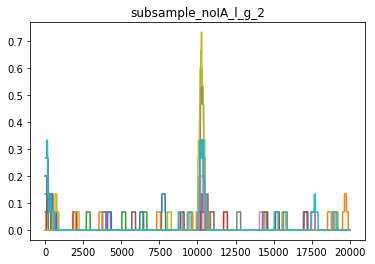

In [9]:
plt.subplot(111)
plt.title(ser_PSTHs.keys()[0])
plt.plot(ser_PSTHs[ser_PSTHs.keys()[0]].T)
plt.show()

## Plot I/O curves

In [11]:
def condname(prefix, model, baseline, gaba, rep):
    """Throwaway function to build keys in a consistent way.
    """
    return '_'.join([prefix, model, baseline, gaba, rep])

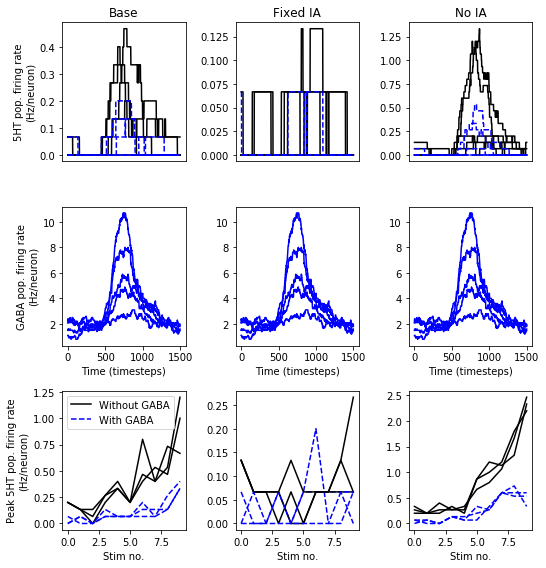

In [15]:
time_slice = slice(9500, 11000)

plt.figure(figsize = (10, 8))

spec_outer = gs.GridSpec(3, 4)

# Column 1: base model
plt.subplot(spec_outer[0, 0])
plt.title('Base')
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'ng', '1')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'g', '1')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])
plt.ylabel('5HT pop. firing rate\n(Hz/neuron)')

plt.subplot(spec_outer[1, 0])
plt.plot(
    gaba_PSTHs[condname('subsample', 'base', 'l', 'g', '1')][::2, time_slice].T,
    'b-'
)
plt.ylabel('GABA pop. firing rate\n(Hz/neuron)')
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 0])
for i in range(1, 4):
    if i == 1:
        plt.plot(
            ser_PSTHs[condname('subsample', 'base', 'l', 'ng', str(i))][:, time_slice].max(axis = 1),
            'k-', label = 'Without GABA'
        )
        plt.plot(
            ser_PSTHs[condname('subsample', 'base', 'l', 'g', str(i))][:, time_slice].max(axis = 1),
            'b--', label = 'With GABA'
        )
    else:
        plt.plot(
            ser_PSTHs[condname('subsample', 'base', 'l', 'ng', str(i))][:, time_slice].max(axis = 1),
            'k-'
        )
        plt.plot(
            ser_PSTHs[condname('subsample', 'base', 'l', 'g', str(i))][:, time_slice].max(axis = 1),
            'b--'
        )
plt.ylabel('Peak 5HT pop. firing rate\n(Hz/neuron)')
plt.xlabel('Stim no.')
plt.legend()

# Column 2: model with fixed IA max cond. and kinetics
plt.subplot(spec_outer[0, 1])
plt.title('Fixed IA')
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng', '1')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'g', '1')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])

plt.subplot(spec_outer[1, 1])
plt.plot(
    gaba_PSTHs[condname('subsample', 'fixedIA', 'l', 'g', '1')][::2, time_slice].T,
    'b-'
)
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 1])
for i in range(1, 4):
    plt.plot(
        ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng', str(i))][:, time_slice].max(axis = 1),
        'k-'
    )
    plt.plot(
        ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'g', str(i))][:, time_slice].max(axis = 1),
        'b--'
    )
plt.xlabel('Stim no.')

# Column 3: Model with no IA
plt.subplot(spec_outer[0, 2])
plt.title('No IA')
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng', '1')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'g', '1')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])

plt.subplot(spec_outer[1, 2])
plt.plot(
    gaba_PSTHs[condname('subsample', 'noIA', 'l', 'g', '1')][::2, time_slice].T,
    'b-'
)
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 2])
for i in range(1,4):
    plt.plot(
        ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng', str(i))][:, time_slice].max(axis = 1),
        'k-'
    )
    plt.plot(
        ser_PSTHs[condname('subsample', 'noIA', 'l', 'g', str(i))][:, time_slice].max(axis = 1),
        'b--'
    )
plt.xlabel('Stim no.')

plt.tight_layout()
plt.show()

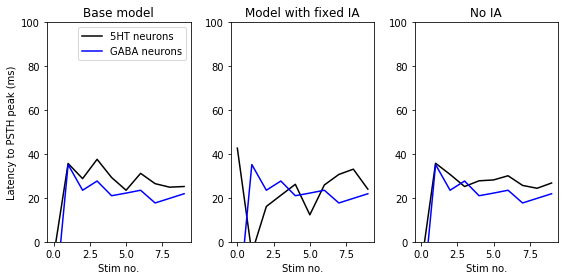

In [9]:
plt.figure(figsize = (8, 4))

ax1 = plt.subplot(131)
plt.title('Base model')
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'ng', '1')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 
    'k-', label = '5HT neurons'
)
plt.plot(
    gaba_PSTHs[condname('subsample', 'base', 'l', 'g', '1')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 
    'b-', label = 'GABA neurons'
)
plt.legend()
plt.ylabel('Latency to PSTH peak (ms)')
plt.xlabel('Stim no.')

plt.subplot(132, sharey = ax1)
plt.title('Model with fixed IA')
plt.plot(ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng', '1')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'k-')
plt.plot(gaba_PSTHs[condname('subsample', 'fixedIA', 'l', 'g')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'b-')
plt.xlabel('Stim no.')

plt.subplot(133, sharey = ax1)
plt.title('No IA')
plt.plot(ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng', '1')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'k-')
plt.plot(gaba_PSTHs[condname('subsample', 'noIA', 'l', 'g', '1')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'b-')
plt.ylim(0., 100.)
plt.xlabel('Stim no.')

plt.tight_layout()
plt.show()

# Close all files

In [10]:
for fname in simfiles.keys():
    simfiles[fname].close()